# 2019 Midterms Solution (MCQ)
This notebook contains annotated solution to the conceptual questions in the 2019 Midterm.
## **DO NOT DISTRIBUTE!**
In the spirit of collaborative learning the faculty has banned uploading solutions to places like Github or Google Drive. Distributing answers in chat is still a grey area, so please only distribute to closed circles.

---
## Q1
Take a look at a code snippet below that contains a function that can compute an area of a circle. What will be the output of the code when it is run?

In [ ]:
def area_of_circle(radius):
    return 3.14159 * radius * radius

r = int(input("Key in the value of radius:"))
area = area_of_circle(r)
print(type(area))

1. `class <'float'>`
2. `class <'int'>`
3. `class <'str'>`
4. `class <'bool'>`

Answer: **1** (`class <'float'>`)

A `float` multiplied by an `int` will still give you a `float` (line 2).

---
## Q2
A student adds minor modification to the code by storing the return value of the function to a variable called area and suggests 5 different print methods:

In [ ]:
def area_of_circle(radius):
    return 3.14159 * radius * radius

r = int(input("Key in the value of radius:"))
area = area_of_circle(r)

print('The area of the circle is: area')                     ## 1
print('The area of the circle is: {0:.3f}'.format(area))     ## 2
print('The area of the circle is: {:.3f}'.format(r))         ## 3
print('The area of the circle is: {:1.3f}'.format(area))     ## 4
print('The area of the circle is: {area:1.3f}'.format(area)) ## 5

When the code is run, which of the print methods will have **the exact same output** when r = 5?

1. 1 and 2
2. 2 and 4
3. 2, 3 and 5
4. 2, 4 and 5
5. 3, 2 and 4

Answer: **2** (2 and 4)

In `str.format()` the general use case of the placeholder brackets (`{}`) is `{<min-width>:.<round to x dp>f}` for floats. The rounding can cause your resulting string to occupy more space than the min-width specified.

Explanation for each one:
1. You're not doing any string formatting here.
2. This will produce `78.540`, because you rounded it to 3dp with `{:.3f}`
3. This is fucked up shit, don't try putting numbers directly before the `.` in `{:1.3f}`
4. This will also produce `78.540`. You rounded it to 3dp with the `3f`, and specified a minimum width of `1`. The minimum width is "ignored" here, as your resulting float-turned-string will overflow to take up 6 characters ( `7` `8` `.` `5` `4` `0` ). If the minimum width was something larger like `10`, then it *would* produce a different result.
5. This will cause an error. By default your placeholder variables are indexed by numbers, so the first argument you pass to `.format()` will be placed in the first `{}` in the formatting string. There are ways to change how the arguments are mapped to your placeholder `{}`s, but this is the wrong way to do it.

[This](https://pyformat.info/) site provides a great summary on the `str.format()` function.

---
## Q3
The student decides that the r should be able to take in *float* values as well, and therefore made the following modification:

In [ ]:
def area_of_circle(radius):
    return 3.14159 * radius * radius

r = float(input("Key in the value of radius:"))
area = area_of_circle(r)
print(area)

Upon running the program, the prompt
```
Key in the value of radius:
```
appears, and the student entered: `1/4`

*Note that this means one-quarter*. Select all statements that are **true and/or will happen**

1. After pressing enter, the program will result in **error**
2. After pressing enter, the program will execute successfully and prints: `0.196349375`
3. After pressing enter, the program will execute successfully and prints: `0.196`
4. The function `float` does not recognise '/' as division between 1 and 4

 Answer: **1 and 4**
 
 The `float()` casting function can only cast strings that look like a floating point number: `3.1412` with optional `+` or `-`. Trying to pass an expression like `1/4` or `1*0.3` will result in a `ValueError`. More info [here](https://docs.python.org/3/library/functions.html#float)

---
## Q4
It is suggested that we can just print out the area of the circle inside the function, instead of heaving to return them, and both ways will do the same calculation of the area of circle. Take a look at the code snippet below:

In [ ]:
def area_of_circle_1(radius):
    return 3.14159 * radius * radius

def area_of_circle_2(radius):
    print(3.14159 * radius * radius)

r = float(input("Key in the value of radius:"))
area_1 = area_of_circle_1(r)
area_2 = area_of_circle_2(r)

print(area_1 == area_2)

What will be the output of `print(area_1 == area_2)`, assuming `r` is a valid float value?

1. True
2. False
3. None
4. Error

Answer: **2** (False)

This is syntatically valid code that will not throw an error. Note that, for the second function, there is no `return` statement. The return value of `area_of_circle_2` will thus be `None`. Even if you wrote `return print(something)`, the return value of `print()` is `None`, so the function will return `None`.

The only thing that can equal to `None` is `None` itself, so the answer is "False".

---
### Tip!
From this example you can probably see that using `print()` inside your function that does only calculations to return the answer is probably not a good idea as it inhibits good code reuse.

---
## Q5
Notice that we hardcode the value of π, which is an irrational number, to compute the area of circle. The python `math` module contains the constant `pi` which contains a way more accurate representation of the value π than `3.14159`.

One of the ways to use pi from the math module is as follows:

In [ ]:
## [1]
def area_of_circle(radius):
    return pi * radius * radius

r = float(input("Key in the value of radius:"))
## [2]
area = area_of_circle(r)
print(area)

Select **ALL** import methods below that will allow us to use `pi` directly from the math module as the above and run the program smoothly without any error.

1. `from math import *` placed at location marked as [1]
2. `from math import pi` placed at location marked as [2]
3. `import math` placed at location marked as [1]
4. `import math as pi` placed at location marked as [1]
5. `import math as *` placed at location marked as [2]

Answer: **1 and 2**

The `import` statement works two ways depending on how you use it:
1. If you do not specify `from`, a `import` imports a **module**, followed by an optional alias `as`
2. If you specify `from`, a `import` imports a **child class/function/object/variable** *directly into the current namespace*, followed by an optional alias `as`. You can place an asterisk after `import` to denote you want to import **everything**.

Method 1 will import the entire module, but you will not be able to access what's inside directly without using the dot operator (`some_module.some_function()`).

Method 2 will let you import only some parts of the module that you want, but it will import directly into your namespace so you do not have to do `some_module.some_function()`. However, since it lives in the same namespace as your code, it may cause variable name conflicts (e.g. `from math import pi`, then you are not allowed to use the name `pi` in later parts of your code).

Options 3, 4, 5 belong to the second method described above, but the question wants `pi` to be accessible without using the dot operator. In addition, option 5 **will produce an error**, as `*` is not a valid alias name (same rules for variable names)

Option 1 and 2 will both make `pi` available to use directly, but option 1 will import not just `pi` but *everything in the module*. This is a generally a recipe for disaster as you have no idea what you're importing (unless you memorise everything on [this](https://docs.python.org/3/library/math.html) page).

---
### Note
From point 1 above, you should also discern that import statements like `import math.pi` is syntatically **invalid**. 

---
## Q6
An alternative way of finding out the value of π is by using a method called **Monte Carlo**. In simple terms, we can randomly select N points (x<sub>i</sub>, y<sub>i</sub>) where i = 1, ...N in a unit square, and determine the ratio M/N, where M is the number of points that we can count that satisfy x<sub>i</sub><sup>2</sup> + y<sub>i</sub><sup>2</sup> ≤ 1. The approximate value of π is then 4*M/N.

The following code below contains four implemented functions for you that will help you estimate the value of π using the Monte Carlo method

In [ ]:
import random
from math import *

def estimate_pi(M,N):
    return (M/N)*4

def generate_x_unitsquare(N):
    x = []
    random.seed(9001) # seed the random module to a constant so we get the same random value for each test for easier comparison
    for i in range(0, N):
        x.append(random.uniform(0,1))
    return x

def check_xy_inside_circle(x,y):
    if ((pow(x,2) + pow(y,2)) <= 1):
        return True
    
def generate_y_unitsquare(N):
    y = []
    for i in range(0, N):
        y.append(random.uniform(0,1))
    return y

def montecarlo_estimate_pi(N):
    ## your code here
    pass

**Select ALL correct implementation(s)** of `montecarlo_estimate_pi(N)` below, such that this function `return`s the estimated value π, where N is the number of points that we should sample from a unit square.

In [ ]:
# If you decide to run this cell, make sure you run the above cell first
# 1
def montecarlo_estimate_pi_1(N):
    x = generate_x_unitsquare(N)
    y = generate_y_unitsquare(N)
    M = 0
    for i in range(0, N, 1):
        if check_xy_inside_circle(x[i], y[i]) == False:
            M = M+1
    return estimate_pi(N-M, N)
# 2
def montecarlo_estimate_pi_2(N):
    x = generate_x_unitsquare(N)
    y = generate_y_unitsquare(N)
    M = 0
    for i in range(0, N):
        if check_xy_inside_circle(x[i], y[i]) == True:
            M = M+1
    return estimate_pi(M, N)
# 3
def montecarlo_estimate_pi_3(N):
    x = generate_x_unitsquare(N)
    y = generate_y_unitsquare(N)
    M = 0
    for i in range(0, N):
        if check_xy_inside_circle(x[i], y[i]):
            M = M+1
    return estimate_pi(M, N)
# 4
def montecarlo_estimate_pi_4(N):
    x = generate_x_unitsquare(N)
    y = generate_y_unitsquare(N)
    M = 0
    for i in range(0, N, 1):
        if check_xy_inside_circle(x[i], y[i]) == False:
            M = M+1
    print(estimate_pi(N-M, N))

Answer: **2 and 3**

At first glance, you can tell that implementation 4 is not what we want, because it does not have a return value and it will always return `None`. Our question specifically asks for the function to *return* the approximation.

Now we examine the algorithms behind the implementations. Implementations 2 and 3 are actually identical: the `if` statement itself already compares the expression to `True`, so doing `if (expr) == True:` is the same as `if (expr):`, and `if (expr) == False:` is the same as `if not (expr):`. Other than this small difference, the implementations of Monte Carlo is exactly what the question asked for.

Implementation 1 is a trick answer. By inverting the condition (`== False`), you might be quick to immediately conclude that the implementation is wrong, but if you take a look at the return statement, he is actually passing `N-M` to `estimate_pi()`. Thus, logically, the final value of the argument that he passes to `estimate_pi()` is still the points *that lie in the circle*, because in this case he took `M` as *points that do not lie in the circle*.

... Except, it didn't actually invert the condition properly. If the function `check_xy_inside_circle()` **did return False**, then it would work – but it DOES NOT! Look at the function definition of `check_xy_inside_circle()` above. The only non-None return value of the function is `True`, there is no `return False`. The function actually returns `None` if the point does not lie in the circle, and since the only thing `None` can be equal to is `None` itself, `None == False` would be `False`, and the implementation would fail. This implementation would be correct if not for the poorly written `check_xy_inside_circle()` function.

You can run the cell below to see the actual outputs of each implementation:

In [ ]:
# run the above two cells first!
answers = []
answers.append(montecarlo_estimate_pi_1(100))
answers.append(montecarlo_estimate_pi_2(100))
answers.append(montecarlo_estimate_pi_3(100))
answers.append(montecarlo_estimate_pi_4(100))
print("Answers: ")
for answer in answers:
    print(answer)

---
### Moral of the story
Everytime you call a function, **make sure you know what it returns!** Examine the function and find **all the possible exit points** (places there is no more code left to be run, or an early `return`). **Do not leave an exit point with no `return` statement** as it will confuse you later and make you think that the function will not return `None`.

In the example above, `check_xy_inside_circle()` has *two* return points, one exits early inside the `if` block, and the normal exit point after the `if` statement if the program does not enter the `if` block. The normal exit point has no explicit `return` statement so it returns `None` by default.

---
## Q7
As the case with many methods of estimation, it is not enough to perform monte-carlo simulation once to get the estimated value of π. A typical procedure is to run the simulation many times. We collected a ten thousand estimated values of π from the monte-carlo method, and then we want to write to the contents of the pi values array into a **new** `.txt` file, where each element in the array is separated by a comma. The folloinwg code snippet attempts to do that:

In [ ]:
# run cells in Q6, and fill up the `montecarlo_estimate_pi()` function before running this cell
pi_values = []
for i in range(1,100):
    pi_values.append(montecarlo_estimate_pi(1000))
    
filename = "pivalues.txt"
# original question:
# file = open(filename, '[A]')
# changed to allow you to see how the code runs here
file = open(filename, input("What should you put here? Do not put quotation marks")) ## Question

for item in pi_values:
    file.write(str(item))
    file.write("\n")
    
file.close()

Run the above cell and give your answer exactly without quotes in the input box, then hit enter.

Answer: **`w`**

When you open a file, Python needs to know what you're going to do with the file, hence the need for "file modes", passed as a string.

`'r'` stands for <b>r</b>ead, `'w'` stands for <b>w</b>rite, `'a'` stands for <b>a</b>ppend.

Trying to write to a file opened in read-only will result to an error.

Writing to a existing file in write-mode will **replace the entire contents of the file after your first write**.

"Append" saves the preserves the original data in the file, and simply adds new data at the end of the file.

There are other, less commonly used file modes that can be read in detail [here](https://docs.python.org/3/library/functions.html#open)

---
## Q8
Suppose you have successfully stored all the estimated pi values into `pivalues.txt` and pass the text file to one of your teammates. Your teammate now has to open the file and read the pi values generated by you. He/she placed `pivalues.txt` and the following code in the same folder:

In [ ]:
# run the above cell before running this
filename = "pivalues.txt"
file = open(filename,'r')

file_content = []
content = file.readline()

while (content != ""):
    file_content.append(content)
    content = file.readline()
    
print("End of file is reached.")

average_pi = 0
for pi_sample in file_content:
    average_pi += pi_sample/len(file_content)

He/she then tries to run the above code and the program terminates with an error. Which line causes the error?

1. `file = open(filename,'r')` (note: typo in original question paper, this is the correct one)
2. `while (content != ""):`
3. `average_pi += pi_sample/len(file_content)`
4. `file_content.append(content)`

Answer: **3**

The general strategy is to first check for Syntax Errors (missing brackets etc), then Name Errors (attempt to access a variable before assigning a value to it), and finally other runtime errors such as Type Errors (forgetting to `float()` or `int()` a `str` before doing math operation – try to trace what kind of variable each variable is holding). Let's do this one by one.
1. Syntax OK. Names referenced is just `filename` (`file` is being *assigned* here, so it is ok). We see that `filename` is already defined on top. And finally, we see if `open()` is used correctly – he passed two arguments, the filename first then the file mode, and `'r'` is a valid file mode. Pass!
2. Syntax OK. Names referenced is just `content`. `content` has been defined above. We know `content` is a string, and it is OK to compare strings with `!-`. Pass!
3. Syntax OK. Names referenced are `pi_sample` and `file_content`. Both variables have been defined above. `pi_sample` is a `str` (created by `file.readline()` above). `file_content` is a `str`, but `len(str)` gives you a `int`. Oh no! You divided a `str` (`pi_sample`) by a `int` (`len(file_content)`)!
4. Syntax OK. Names referenced are `file_content` and `content`. Both names are defined in this scope. `file_content` is a list, `content` is a string. `.append()` is a member function of a `list`, so it is used correctly here. Pass!
---
### Note
A *runtime error* is an error that can only be picked up at runtime, so your script will run partially until the bad line and quit. *Syntax errors*, on the other hand, wont even let the Python interpreter run your code because it doesn't understand your code.

---
## Q9
Suppose that the program state (memory) consists of two variables (`x` and `y`) that reference the following list structure:
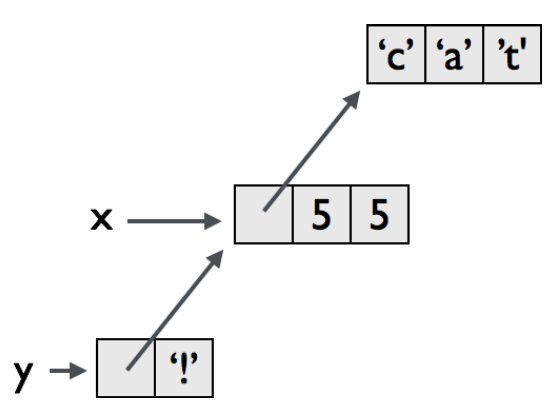
After executing the line `y[one][two][three] = four`, the program state becomes:
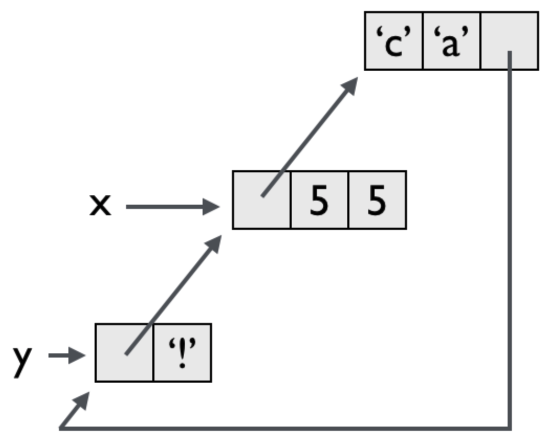
What were the values of `one`, `two`, `three`, and `four`?

Answer: `0`, `0`, `2`, `y`

Perhaps it will be clearer once you know recognise that these are lists, and individual elements in the list can be addressed with numerical indexes:
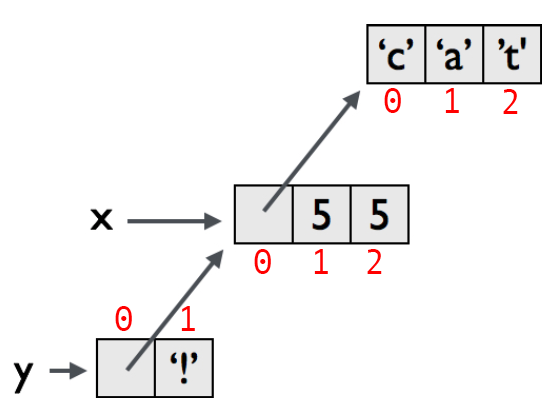
You want the third element of the list containing the `'c'` `'a'` `'t'` to point to `y`. Starting from `y` then, you would first get the first element of `y` (`0`) that points to a list, and that list's first element (`0`) points to the list containing the `'c'` `'a'` `'t'`. Finally, you access the third element (replacing the `'t'`) with `2`, then reassign it (`=`) back to `y`.
So you end up with `y[0][0][2] = y`. Below is python code you can use to play with:

In [ ]:
x = [['c','a','t'], 5, 5]
y = [x, '!']
# change below
one = 0
two = 0
three = 2
four = y
# change above
y[one][two][three] = four
# test – no errors if correct
assert y[0][0][2] is y
# we use is instead of == to check if it refers to the same object in memory

Note that given a pictorial map like above, it is expected that you are able to produce Python code that will generate the same layout in memory.

---
### Trivia
Object layouts like these are known as *cyclic references*, where some child (or "grandchild", "great-grandchild") property of an object will eventually refer back to the parent object itself. Quite powerful if used correctly, but otherwise setting yourself up for trouble with infinite loops.

---
## Q10
Suppose that the program state (memory) consists of two variables (`x` and `y`) that reference the following list structure:
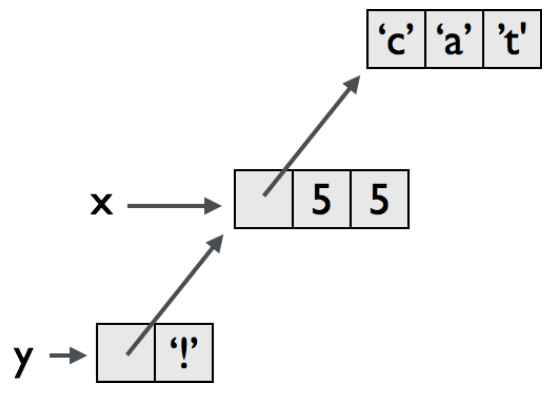
After executing the line `x[one][two] = y[three][four]` the program state becomes
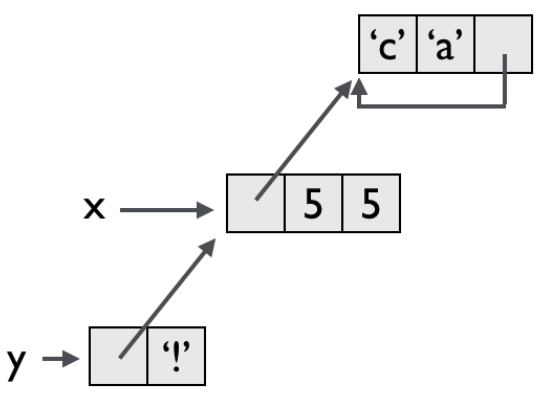
What were the values of `one`, `two`, `three`, and `four`?

Answer: `0`, `2`, `0`, `0`

First you can visualise the indexes of the lists like in Q9. Then again, you see what is being changed to what – with respect to `x`, we see that in the first element `0` of `x`, a list, its third element (`3`) is being replaced to the list itself (originally containing `'c'` `'a'` `'t'`). From the question, we know that we need to access this "cat list" from `y`, and we can see from the diagram that the list is reachable with the address `y[0][0]` as it is the first element of the first element of y (list in a list in a list).

Play with the python code below to check your understanding:

In [ ]:
x = [['c','a','t'], 5, 5]
y = [x, '!']
# change below
one = 0
two = 2
three = 0
four = 0
# change above
x[one][two] = y[three][four]
# test – no errors if correct
assert x[0][2] is y[0][0]
# we use is instead of == to check if it refers to the same object in memory

---
## Q11
Which of the following statements concerning **dictionaries** and **lists** are true?

1. After popping the first element of a list (e.g. `lst.pop(0)`), retrieving the value at position 0 (e.g. `lst[0]`) will **always** result in an error.
2. It is possible to iterate over the values of lists but **not** the values of dictionaries.
3. The positions of lists are ordered but the keys of dictionaries are not.
4. The keys of dictionaries can be **nested** tuples.
5. A dictionary key can contain a list **as long** as it is nested in a tuple.
6. Given a dictionary **d**, the function calls `list(d)` and `list(d.keys())` both return a list of the keys of `d`.

Answer: **3, 4, 6**

Answering this question requires a deep understanding of how lists and dictionaries work. If you do not have one, an ability to read the Python manuals would also prove useful. Let's dive into each of these statements:

### Option 1
**False**. From the [python manual](https://docs.python.org/3.7/tutorial/datastructures.html#more-on-lists):

> Remove the item at the given position in the list, and return it. If no index is specified, a.pop() removes and returns the last item in the list.

After popping, elements of the list will "move to fill the gap", and the indexes will change to reflect this change. So as long as your starting list had more than one element inside, `lst[0]` will always be there. The only way to get an error from `lst[0]` after `lst.pop(0)` is when your list only had one element at the start and you popped it, resulting in an empty list and a `IndexError` if you try to access the first element inside.

### Option 2
**False**. From the [python manual](https://docs.python.org/3.7/tutorial/datastructures.html#looping-techniques):

> When looping through dictionaries, the key and corresponding value can be retrieved at the same time using the items() method.

If you only want to loop through the values of a dictionary, dictionaries also has the `.values()` [function](https://docs.python.org/3.7/library/stdtypes.html?highlight=dict#dict.values).

### Option 3
**True**. From the [python manual on lists](https://docs.python.org/3/library/stdtypes.html#lists)

> Lists are **mutable sequences**, typically used to store collections of homogeneous items (where the precise degree of similarity will vary by application).

A *sequence* implies that the order of items matter. Compared to the [python manual on dicts](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)

> Unlike sequences, which are indexed by a range of numbers, dictionaries are indexed by keys, which can be any immutable type; strings and numbers can always be keys.

The tradeoff for allowing any immutable type as a key is that you can no longer (easily) predict the order of items in your dictionary.

For comparison purposes then, two lists containing the same contents but in different orders are not equal, but two dictionaries containing the same key-value pairs (items) inserted in different orders are treated as equal. See the following Python snippet below.

In [ ]:
list_one = [1,2,3,4]
list_two = [4,3,2,1]
print(list_one == list_two)
dict_one = {
    "SUTD": "Singapore University of Technical Difficulties",
    "NUS": "National University of Singapore"
}
dict_two = {
    "NUS": "National University of Singapore",
    "SUTD": "Singapore University of Technical Difficulties"
}
print(dict_one == dict_two)

### Option 4
**True**. See above on the point that dictionary keys can be any immutable type.
The formal definition of mutable/immutable may be beyond the scope for this course, you can memorise the categories as follows:

| Mutable                               | Immutable             |
|---------------------------------------|-----------------------|
| Lists                                 | Strings               |
| Dictionaries                          | Ints and Floats       |
| Sets                                  | Tuples                |
| Most user-defined classes, by default | Booleans (True/False) |

However, if a immutable type contains another mutable type (e.g. a tuple contains a list), it is not longer valid to use as a dictionary key. However, immutable in another immutable (e.g. tuple in a tuple) is ok.

### Option 5
**False**. Following above, a list cannot be used as a dictionary key even if you put it in a tuple.

### Option 5
**True**. Trying to convert a dict into a list with `list()` will return you a list of the dictionaries *keys only*. Dictionaries also have the `.keys()` and `.values()` functions that will return you list-like objects that represent the dictionary's keys and values respectively. If you want to retrieve dictionary entries (both key and value at the same time), `.items()` returns you a list-like object containing a list of key-value pairs.

* "List-like object" as in, it looks like a list and works like a list (you can iterate through it with `for` loops and use the square bracket operator `[]`, but its type is actually not a list.

---
### Morale of the story
If *The Art of War* (兵法) was written today, Sun Tzu would include a section on how important it is to read your software manuals.

> 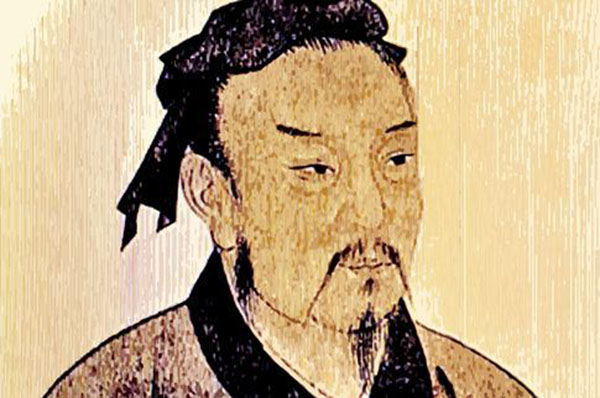
> <div style="text-align:center"><h3><em><a href="https://en.wikipedia.org/wiki/RTFM">Read the fucking manual!</a></em></h3><span>– Probably not Sun Tzu, 2019</span></div>

No seriously. Read the manual. Safe exam browser lets you open the Python manual while answering the concept questions on eDimension or doing the actual coding on Vocareum.

---
## Q12
A dictionary is defined to represent the non-zero elements of a matrix:

In [ ]:
M = {(0,3):5, (2,2):7, (3,3):1}

After running the following code:

In [ ]:
for i in range(5):
    for j in range(5):
        # init answers
        one = None # write something here
        two = None # write something here
        three = None # write something here
        print(M.get((one,two), three), end=' ')
    print("\n")

the console displays the following
```
0 0 0 5 0 

0 0 0 0 0 

0 0 7 0 0 

0 0 0 1 0 

0 0 0 0 0 
```

What were the values of `one`, `two`, and `three`?

Answer: `i`, `j`, and `0`

First study the dictionary `M`. `M` is a homogeneous<sup>[1]</sup> dictionary: each item has a 2-tuple as the key and a integer as the value.

Next we look at the print statements in the loop. The innermost print statement prints something complicated, the outermost print statement prints a newline (`\n`). From observing the sample output given in the question, you can thus tell that the innermost print statement is actually printing numbers on each line one at a time.

The `dict.get(key, default)` function is a "safe" way of retrieving values from a dictionary. Normally, when you retrieve a value from a dictionary like `M[key]`, if the `key` does not exist in the dictionary your program will throw a `KeyError` and stop your entire program. The `get()` method allows you to safely fallback to a specified fallback value if the key does not exist.

We see that the innermost `print()` statement takes in the result of `M.get((one,two), three)` as the thing to print. The `end` keyword argument in the `print()` function specifies the character to print after the main thing to print, it is by default a newline character (`\n`) but it has been changed to a space.

We see that in the example output, the grid is producing all `0`'s except for a few other numbers. These few other numbers are values present in the dictioanry. This implies that `three` is `0` (fallback value for `M.get()`), and `(one, two)` is the key.

The final problem is choosing how to generate the key. Try to find the relation between the dictionary's keys and the output. For the key `(0,3)`, we see that the corresponding value `5` appears on the first row (`0`) and the fourth column (`3`). We can conclude that the keys actually refer to `(row, column)`.

Now we have to find which loop variable corresponds to the row. We see that newlines are printed on the outer loop. Hence the row variable is `i`, and the column variable is `j`. So the final answer is `M.get((i, j), 0)`.

---
### Notes
<sup>[1]</sup> a homogeneous dictionary refers to key-value pairs all having the same type: here, all keys are 2-tuples, and all values are integers.

If you swap `i` and `j` in the key passed to the `get()`, function, you will get the transposed version of the output shown above.

---
## Q13
Suppose that the program state (memory) consists of the variable `x` pointing to the following list structure:
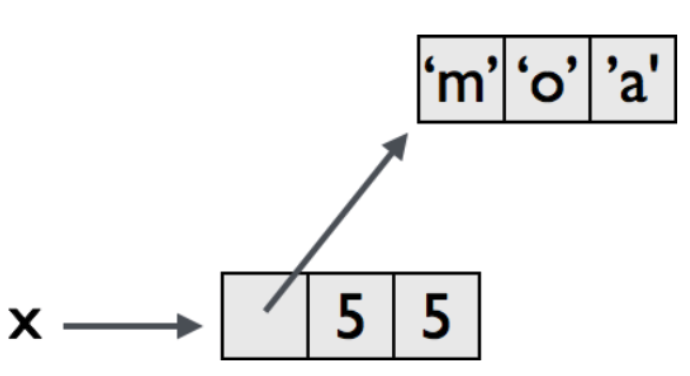
After performing a **shallow copy** `y = <shallow_copy_of_x>`, the program state is now:
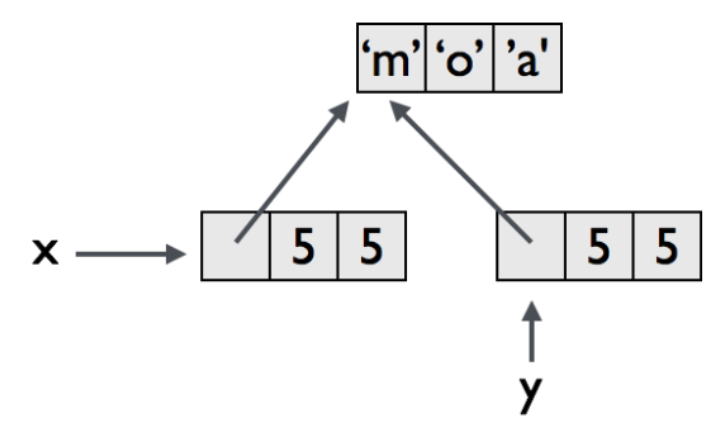
What **list slicing code** is needed in place of `<shallow_copy_of_x>` to establish this program state?

Answer: **`x[:]`**

List slicing always produces a shallow copy. `[:]` is shorthand for `[0:]`, which means "copy from position zero" => copy the entire list.

---
## Q14
Suppose that `x` references a list, and the following code is executed:
```
y = something
```

As a result, y now references a shallow copy of `x` but with all of its values in **reverse order**.

What **list slicing code** in place of `something ` would achieve this result?

Answer: **`x[::-1]`**

This would produce a (shallow) copy of the list with the same start and end range as Q13, but in reverse order.

Play with this in the cell below:

In [ ]:
x = [['m','o','a'], 5, 5]
y = x[:]
print(y)
print(x[0] is y[0]) # should be true
y = x[::-1]
print(y)
print(x[0] is y[-1]) # should be true

---
## Q15
Which of the following statements about **aliasing, shallow copy, and deep copy** are true?

1. If `x` and `y` are **aliased**, then it is **always** the case that `x[0] == y[0]`.
2. If `x` and `y` are **not aliased**, then it is **never** the case that changing the value of `x[0][0]` also changes the value of `y[0][0]`.
3. If `x` references a list that **does not** contain any nesting, then a shallow copy of `x` is equivalent to a deep copy of `x`.
4. Shallow and deep copy operations for **dictionaries** are equivalent, because the keys of dictionaries are immutable.
5. If a program calls `some_function(x)` where `x` references a list, then the body of `some_function` operates on a **shallow copy** of the list.
6. If `x` references a nested list, then a deep copy of `x` will take up **more memory** than a shallow copy of x.

Answer: **1, 3, 6**

First, here is a diagram to illustrate the difference between alias, shallow copy and deep copy:
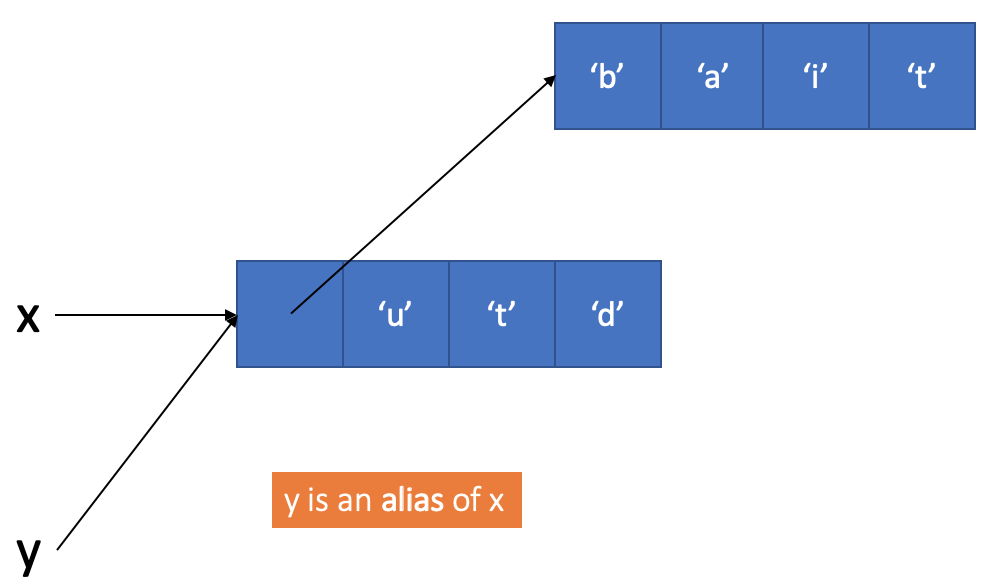
In an alias, (i.e. `y = x`), whatever you do to `y`, you're actually modifying `x`.
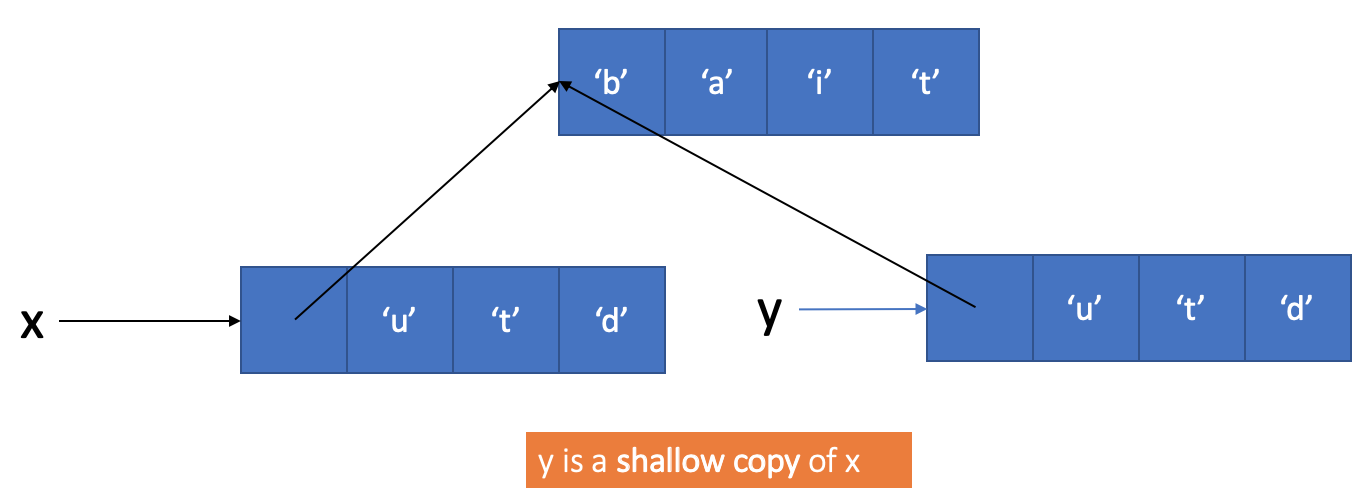
In a shallow copy (i.e. `y = x[:]` or `y = x.copy()`), `y` and `x` themselves refer to different objects, but their child properties/elements may refer back to the same original object.
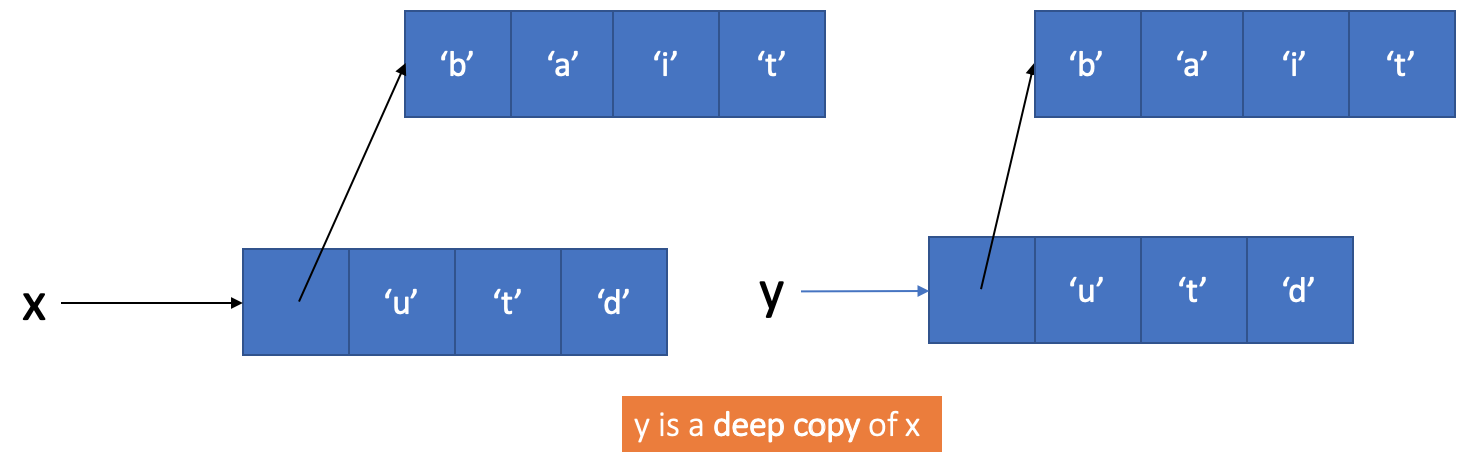
In a deep copy, (i.e. `import copy; y = copy.deepcopy(x)`), everything in `y` is recursively copied. Nothing in `y` will reference back to anything that has a reference to `x`.

Playground:

In [ ]:
import copy
x = [['b','a','i','t'],'u','t','d']
y_alias = x
y_shallowcopy = x[:]
y_deepcopy = copy.deepcopy(x)

Now that we have these diagrams, let's dive into the statements one by one:

Option 1: **True**

If `y` is an alias of `x`, whatever you do to `y` will be the same as what you do to `x`. Not only `x[0] == y[0]`, but also `x[1] == y[1]`, `x[2] == y[2]`.... If you do operations such as `y.pop()`, `x` will be affected as well.

To check if two variable names actually refer to the same object in memory (i.e. they are aliases), you can use the `is` operator:

In [ ]:
print(y_alias is x) # should be true

Option 2: **False**

If you perform a shallow copy instead of a deep copy, you can end up in a situation where this is true. Shallow copy does not go beyond the "first level".

In [ ]:
x[0][0] = 'lmao'
print(y_shallowcopy[0][0]) # should also become `lmao`

Option 3: **True**

As above, shallow copy does not go beyond the "first level". If your list has no data types that contain any form of nesting, a shallow copy would be effectively equal to a deep copy.

In [ ]:
a = [1,2,3]
b = a[:]
c = copy.deepcopy(a)
print(b == c) # should print true

Option 4: **False**

Same logic applies for lists, it depends on whether if any value of the dictionary contains any form of nesting (e.g. a dictionary of lists). Whether keys are immutable or not is not relevant.

In [ ]:
dict_a = {
    "some_list": [1,2,3]
}
dict_shallow = dict_a.copy()
dict_deep = copy.deepcopy(dict_a)
# try modifying the list value inside the dictionary
dict_a["some_list"].pop()
print(dict_a["some_list"] == dict_shallow["some_list"]) # true
print(dict_a["some_list"] == dict_deep["some_list"]) # false
print(dict_a["some_list"] is dict_shallow["some_list"]) # true
print(dict_a["some_list"] is dict_deep["some_list"]) # false

Option 5: **False**

A tough choice possibly outside the scope of this course. Even if you don't know the answer to this question, you can conduct an experiment in your online IDEs to find the answer:

In [ ]:
# first create a list
some_list = [1,2,3]
# create a function that will prove whether it operates on a shallow copy or not – a function that attempts to edit the argument
def pop_list(a_list):
    a_list.pop()
# call pop_list and pass some_list
# if it operates on a shallow COPY, some_list will not be changed after the function call
print(some_list)
pop_list(some_list)
print(some_list)

The results may be suprising, it actually operates as if it's an alias! But what about:

In [ ]:
some_number = 9001
def plus_one(a_number):
    a_number += 1

print(some_number)
plus_one(some_number)
print(some_number) # will the value of some_number change like previously?

Wait what? Now it looks like a copy? What's happening?

The full story is that the alias/copy/deepcopy issue only happens for **mutable** objects, where multiple instances of the same type containing the same value are allowed to exist in memory while belonging to separate variable names, such as list, dicts and most custom objects. This is not the case for **immutable** objects, where only one instance of the type containing the same value is allowed to exist in memory, and you cannot edit them in place – you have to destroy the reference to the object and create a new one.

This characteristic of Python is known as *"pass by assignment"*, and different programming languages work differently. For example, most C-family languages work by *"pass by value"* by default, where a copy of the arguments is always made unless you tell it not to. A summarised version of this behaviour in Python can be found [here](https://stackoverflow.com/a/986145).

If you don't understand this, don't panic. The more important takeaway is that if you can't predict the behaviour of code on paper and you have access to an IDE, use it. Set up experiments and think about the expected output/behaviour for each possible scenario. The Scientific Method™ comes to the rescue!

Option 6: **True**

From the diagrams above, you can see that deep copy literally takes up more space, because you're creating many more new objects that are indepedent from the original object.